<a href="https://colab.research.google.com/github/gleiciny/App-layout/blob/main/Atividade_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

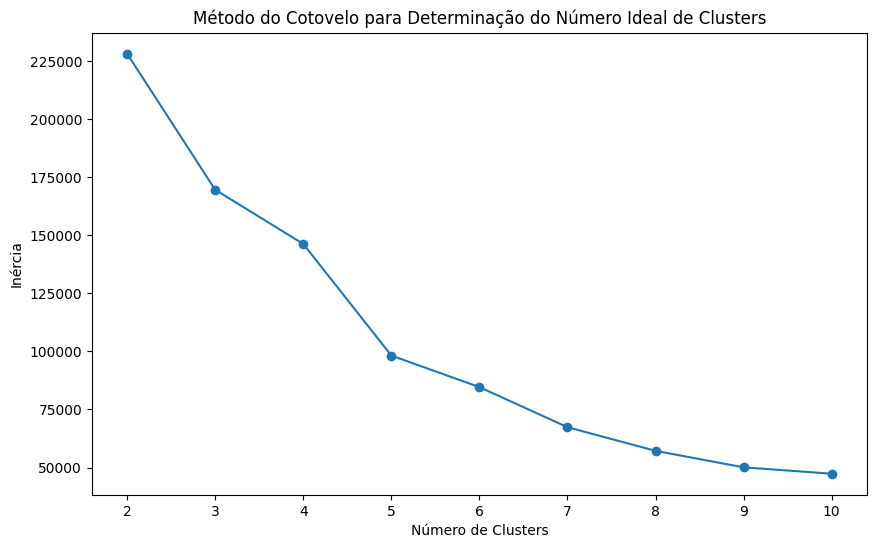

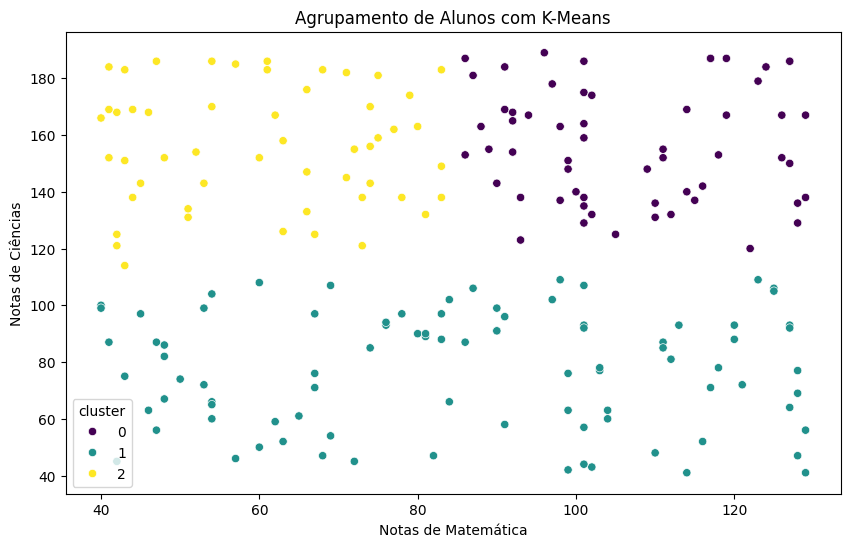

Número Ideal de Clusters: 3
Índice de Silhueta: 0.41


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Gerando dados fictícios para notas de matemática e ciências
np.random.seed(42)
num_students = 200
math_scores = np.random.randint(40, 130, num_students)
science_scores = np.random.randint(40, 190, num_students)

# Criando um DataFrame
data = pd.DataFrame({
    'math_scores': math_scores,
    'science_scores': science_scores
})

# Determinando o número ideal de clusters usando o método do cotovelo
inertia = []
silhouette = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data, kmeans.labels_))

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do Número Ideal de Clusters')
plt.show()

# Escolhendo o número ideal de clusters (neste caso, baseado no método do cotovelo e índice de silhueta)
ideal_clusters = 3  # Escolha baseada na análise dos gráficos

# Aplicando o algoritmo K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=ideal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Visualizando os clusters em um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math_scores', y='science_scores', hue='cluster', data=data, palette='viridis')
plt.xlabel('Notas de Matemática')
plt.ylabel('Notas de Ciências')
plt.title('Agrupamento de Alunos com K-Means')
plt.show()

# Exibindo as métricas de avaliação do agrupamento
silhouette_avg = silhouette_score(data[['math_scores', 'science_scores']], data['cluster'])
print(f'Número Ideal de Clusters: {ideal_clusters}')
print(f'Índice de Silhueta: {silhouette_avg:.2f}')
